<a href="https://colab.research.google.com/github/JKTajo/20250714_count_TAX/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-2

In [7]:
import requests
import pandas as pd
import json
import numpy as np

# url 및 api key 설정
url = 'http://openapi.seoul.go.kr:8088/5a6d4349626a756e35364a70467556/json/energyUseDataSummaryInfo/1/5/'
api_key = '5a6d4349626a756e35364a70467556'

# 원하는 데이터 수집
def get_year_months():
    year_months = []
    for year in range(2020, 2024+1):
        for month in range(1,12+1):
            year_months.append(f'{year}{month:02d}')
    return year_months

year_months_list = get_year_months()

sum_data = []

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]
    new_url = f'{url}{year}/{month}/'
    try:
        response = requests.get(new_url, timeout=5)
        response.raise_for_status()
        data = response.json()
        if data.get('energyUseDataSummaryInfo'):
            rows = data['energyUseDataSummaryInfo'].get('row',[])
            for r in rows:
                if r.get('MM_TYPE') == '개인':
                    extracted = {
                    'YEAR' : r.get('YEAR'),
                    'MON' : r.get('MON'),
                    'MM_TYPE' : r.get('MM_TYPE'),
                    'EUS' : r.get('EUS'),
                    'GUS' : r.get('GUS'),
                    'WUS' : r.get('WUS'),
                    'HUS' : r.get('HUS'),
                }
                sum_data.append(extracted)

    except requests.exceptions.RequestException as e:
        print(f"API 호출실패: {year_month}, {e}")
    except json.JSONDecodeError:
        print(f"JSON 파싱 실패 : {year_month}, {e}")
    finally:
        print("처리 완료")



print(sum_data)

처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
처리 완료
[{'YEAR': '2024', 'MON': '12', 'MM_TYPE': '개인', 'EUS': '134828126', 'GUS': '42103424', 'WUS': '7326853.6', 'HUS': '1513199.277'}, {'YEAR': '2024', 'MON': '12', 'MM_TYPE': '개인', 'EUS': '134828126', 'GUS': '42103424', 'WUS': '7326853.6', 'HUS': '1513199.277'}, {'YEAR': '2024', 'MON': '12', 'MM_TYPE': '개인', 'EUS': '134828126', 'GUS': '42103424', 'WUS': '7326853.6', 'HUS': '1513199.277'}, {'YEAR': '2024', 'MON': '12', 'MM_TYPE': '개인', 'EUS': '134828126', 'GUS': '42103424', 'WUS': '7326853.6', 'HUS': '1513199.277'}, {'YEAR': '2024', 'MON': '12', 'MM_TYPE': '개인', 'EUS': '134828126', 'GUS': '42103424', 'WUS': '7326853.6', 'HUS': '1513199.2

2-1

In [8]:
# 데이터프레임화
# json 파일 저장
with open('energy.json', mode='w', encoding = 'utf-8')as f:
    json.dump(sum_data, f, indent = 4, ensure_ascii=False)

# dataframe 생성
df = pd.DataFrame(sum_data)
# 데이터 측정
df.describe()
df
# DataFrame 인덱스 출력
print(df.index)
# DataFrame 컬럼 출력
print(df.columns)
# DataFrame 행 출력
print(df.values.tolist())
# DataFrame 값 출력
print(df.values.flatten())
# DataFrame의 크기
print(df.shape)
# 요약
print(df.describe())


RangeIndex(start=0, stop=300, step=1)
Index(['YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS'], dtype='object')
[['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2024', '12', '개인', '134828126', '42103424', '7326853.6', '1513199.277'], ['2020', '02', '개인', '254879033', '76363768', '14052828.8', '20848668.612'], ['2020', '02', '개인', '254879033', '76363768', '14052828.8', '20848668.612'], ['2020', '02', '개인', '254879033', '76363768', '14052828.8', '20848668.612'], ['2020', '02', '개인', '254879033', '76363768', '14052

2-2

In [18]:
# 연도 컬럼 추가
df['YEAR'] = pd.to_datetime(df['YEAR'])
df['year'] = df['YEAR'].dt.year

#계절 컬럼 추가
df['MON'] = df['MON'].astype(int)
df['season'] = df['MON'].map(lambda x : '봄' if 3 <= x <= 5
                                      else '여름' if 6 <= x <= 8
                                      else '가을' if 9 <= x <= 11
                                      else '겨울')
df[['MON','season']]

,MON,season
0,12,겨울
1,12,겨울
2,12,겨울
3,12,겨울
4,12,겨울
...,...,...
295,11,가을
296,11,가을
297,12,겨울
298,12,겨울


3-1

In [30]:
# 한글 처리를 위한 matplotlib 설정 (1)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and direc

In [10]:
# 한글 처리를 위한 matplotlib 설정 (2)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

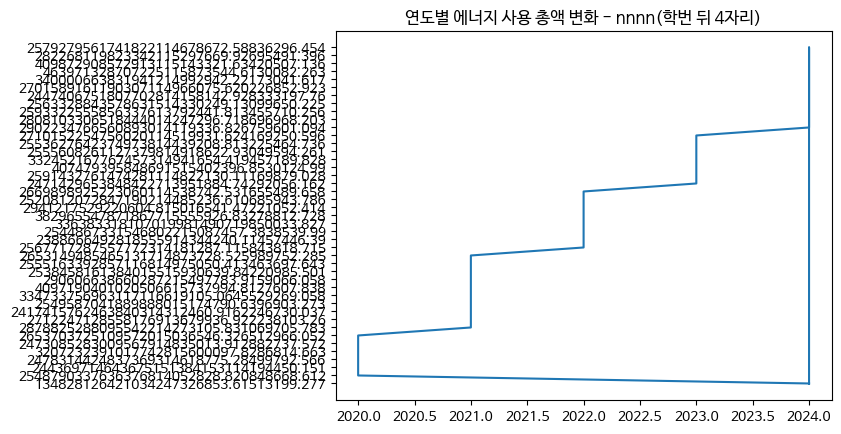

In [12]:
# 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선그래프로 시각화
# EUS+GUS+WUS+HUS
import matplotlib.pyplot as plt
df['sum'] = df[['EUS','GUS','WUS','HUS']].sum(axis=1)

plt.plot(df['year'],df['sum'])
plt.title('연도별 에너지 사용 총액 변화 - nnnn(학번 뒤 4자리)')
plt.show()

3-2

In [21]:
# 계절별 가스 사용량 평균을 막대 그래프로 시각화
season_mean = df.groupby('season')['GUS'].mean().reset_index()
print(season_mean)

TypeError: agg function failed [how->mean,dtype->object]

In [22]:
df.pivot_table(
    values='GUS',
    index='season',
    aggfunc='mean'
)

TypeError: agg function failed [how->mean,dtype->object]